<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [113]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [62]:
data = pd.read_csv('./train.csv')

In [63]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]


feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [64]:
data.tail()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0
5281,19,75.90,1375.6,Female,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,0


In [65]:
data.isna().any(axis=0)

ClientPeriod                False
MonthlySpending             False
TotalSpent                  False
Sex                         False
IsSeniorCitizen             False
HasPartner                  False
HasChild                    False
HasPhoneService             False
HasMultiplePhoneNumbers     False
HasInternetService          False
HasOnlineSecurityService    False
HasOnlineBackup             False
HasDeviceProtection         False
HasTechSupportAccess        False
HasOnlineTV                 False
HasMovieSubscription        False
HasContractPhone            False
IsBillingPaperless          False
PaymentMethod               False
Churn                       False
dtype: bool

In [66]:
# 9 значений с пустым TotalSpent

print("значений с пустым TotalSpent: ", data[data['TotalSpent'] == ' '].shape[0])
data['TotalSpent'] = data['TotalSpent'].replace(' ', None)
data['TotalSpent'] = data['TotalSpent'].astype(float)

значений с пустым TotalSpent:  9


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

### 1)

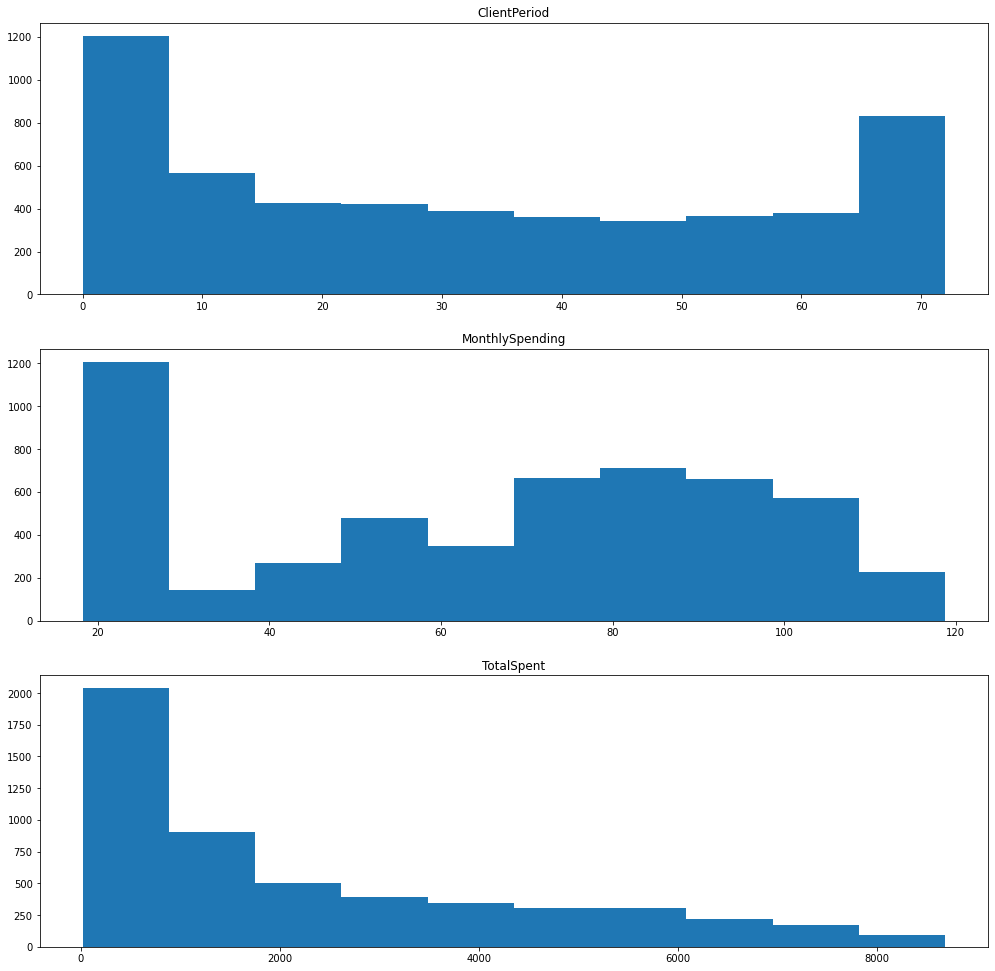

In [119]:
# YOUR CODE
plt.rcParams["figure.figsize"] = (17, 17)

fig, axs = plt.subplots(len(num_cols))

for i, col in enumerate(num_cols):
    axs[i].hist(data[col])
    axs[i].set_title(col)

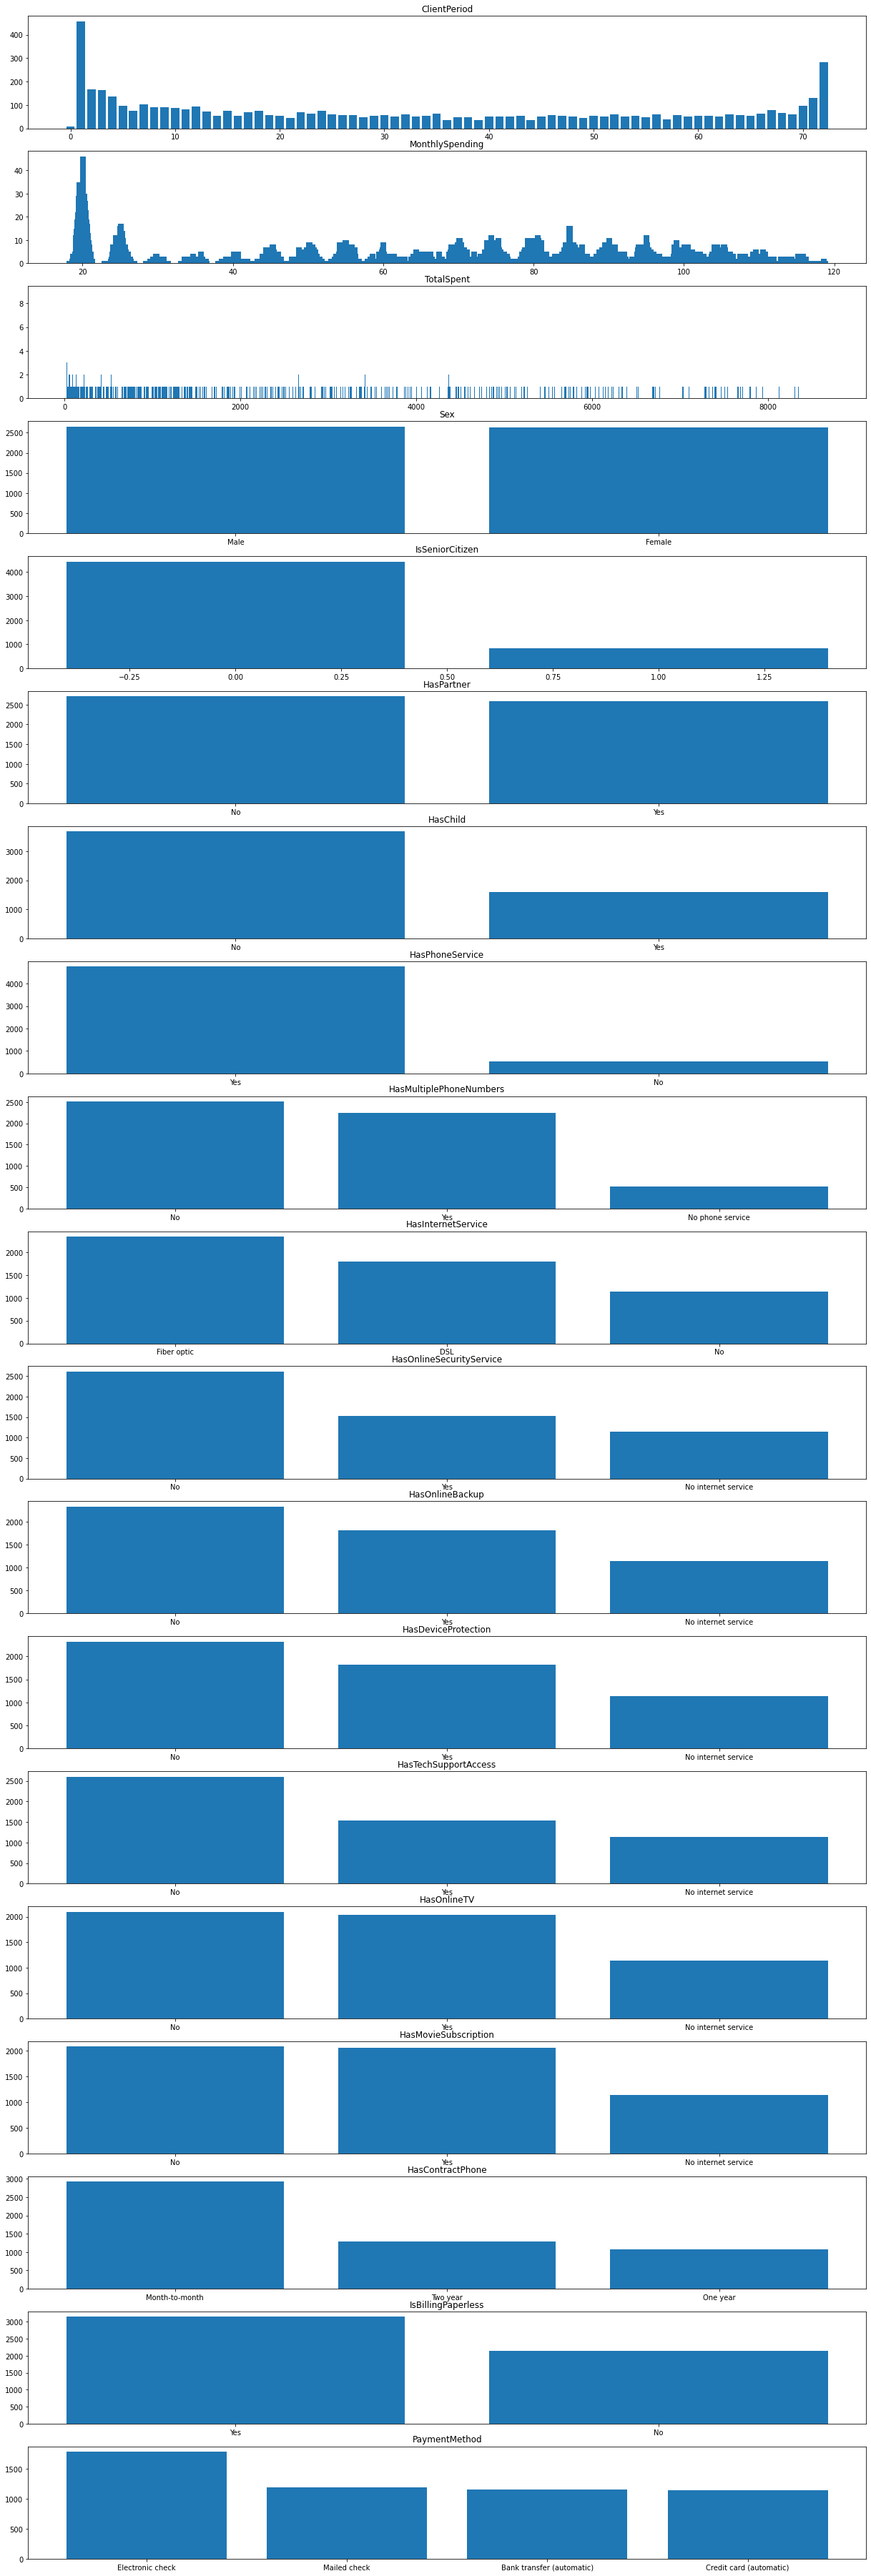

In [124]:
plt.rcParams["figure.figsize"] = (17, 50)

fig, axs = plt.subplots(len(feature_cols))
fig.tight_layout()

for i, col in enumerate(feature_cols):
    value_counts = data[col].value_counts().to_frame().reset_index()
    axs[i].bar(value_counts['index'], value_counts[col])
    axs[i].set_title(f"{col}")

### 2)

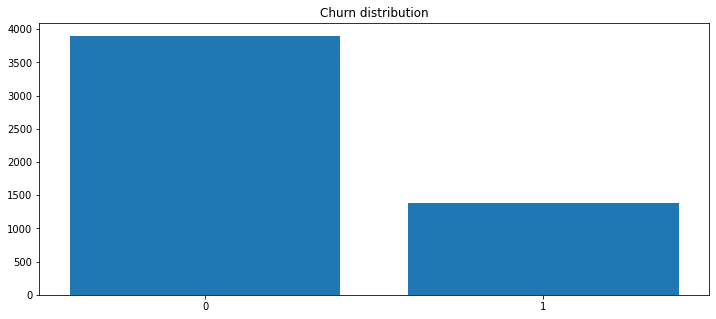

In [151]:
plt.rcParams["figure.figsize"] = (12, 5)

value_counts = data[target_col].value_counts().to_frame().reset_index()
plt.bar(value_counts['index'], value_counts['Churn'])
plt.title(f"{target_col} distribution");
plt.xticks([0, 1])
print()

Классы являются несбалансироваными, т.к. класс `1` более чем в 2 раза больше `0`

### 3)

In [154]:
from pandas_visual_analysis import VisualAnalysis

In [156]:
VisualAnalysis(data)

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [208]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [181]:
RANDOM_STATE = 10

In [202]:
# YOUR CODE
column_transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), cat_cols),
    (RobustScaler(), num_cols)
)

pipeline = make_pipeline(column_transformer, LogisticRegression())
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
param_grid = {
    "logisticregression__C": [100, 10, 1, 0.1, 0.01, 0.001]
}

gs = GridSearchCV(pipeline, param_grid, scoring="roc_auc", cv=kfolds, n_jobs=4)

In [203]:
gs = gs.fit(data[feature_cols], data[target_col])

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [204]:
gs.best_score_

0.8456625721317433

In [205]:
gs.best_params_

{'logisticregression__C': 100}

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

### 1)

In [221]:
# YOUR CODE
import catboost

splitted_data = train_test_split(data[feature_cols], 
                                 data[target_col], 
                                 test_size=0.25, 
                                 stratify=data[target_col],
                                 random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = splitted_data

cat_classifier = catboost.CatBoostClassifier(eval_metric="AUC")

train_dataset = catboost.Pool(data=X_train,
                     label=y_train,
                     cat_features=cat_cols)

eval_dataset = catboost.Pool(data=X_val,
                    label=y_val,
                    cat_features=cat_cols)

In [222]:
cat_classifier.fit(train_dataset, eval_set=eval_dataset)

Learning rate set to 0.044521
0:	test: 0.7774092	best: 0.7774092 (0)	total: 11.3ms	remaining: 11.3s
1:	test: 0.8142849	best: 0.8142849 (1)	total: 22.8ms	remaining: 11.4s
2:	test: 0.8200341	best: 0.8200341 (2)	total: 34.7ms	remaining: 11.5s
3:	test: 0.8190826	best: 0.8200341 (2)	total: 46.9ms	remaining: 11.7s
4:	test: 0.8194086	best: 0.8200341 (2)	total: 56.2ms	remaining: 11.2s
5:	test: 0.8229850	best: 0.8229850 (5)	total: 64.4ms	remaining: 10.7s
6:	test: 0.8255758	best: 0.8255758 (6)	total: 72.7ms	remaining: 10.3s
7:	test: 0.8255491	best: 0.8255758 (6)	total: 75.7ms	remaining: 9.39s
8:	test: 0.8243219	best: 0.8255758 (6)	total: 79.3ms	remaining: 8.74s
9:	test: 0.8240714	best: 0.8255758 (6)	total: 84.9ms	remaining: 8.4s
10:	test: 0.8237291	best: 0.8255758 (6)	total: 90.7ms	remaining: 8.15s
11:	test: 0.8233185	best: 0.8255758 (6)	total: 96.5ms	remaining: 7.94s
12:	test: 0.8243679	best: 0.8255758 (6)	total: 102ms	remaining: 7.76s
13:	test: 0.8250926	best: 0.8255758 (6)	total: 108ms	remain

118:	test: 0.8365555	best: 0.8365555 (118)	total: 778ms	remaining: 5.76s
119:	test: 0.8365763	best: 0.8365763 (119)	total: 783ms	remaining: 5.75s
120:	test: 0.8365763	best: 0.8365763 (119)	total: 795ms	remaining: 5.78s
121:	test: 0.8365348	best: 0.8365763 (119)	total: 811ms	remaining: 5.83s
122:	test: 0.8365348	best: 0.8365763 (119)	total: 821ms	remaining: 5.85s
123:	test: 0.8365051	best: 0.8365763 (119)	total: 835ms	remaining: 5.89s
124:	test: 0.8365614	best: 0.8365763 (119)	total: 847ms	remaining: 5.93s
125:	test: 0.8364933	best: 0.8365763 (119)	total: 857ms	remaining: 5.94s
126:	test: 0.8365051	best: 0.8365763 (119)	total: 869ms	remaining: 5.97s
127:	test: 0.8365644	best: 0.8365763 (119)	total: 881ms	remaining: 6s
128:	test: 0.8366029	best: 0.8366029 (128)	total: 887ms	remaining: 5.99s
129:	test: 0.8365555	best: 0.8366029 (128)	total: 895ms	remaining: 5.99s
130:	test: 0.8367185	best: 0.8367185 (130)	total: 903ms	remaining: 5.99s
131:	test: 0.8368341	best: 0.8368341 (131)	total: 910m

238:	test: 0.8393983	best: 0.8395539 (224)	total: 1.77s	remaining: 5.63s
239:	test: 0.8394842	best: 0.8395539 (224)	total: 1.77s	remaining: 5.62s
240:	test: 0.8395583	best: 0.8395583 (240)	total: 1.78s	remaining: 5.62s
241:	test: 0.8395672	best: 0.8395672 (241)	total: 1.79s	remaining: 5.62s
242:	test: 0.8395880	best: 0.8395880 (242)	total: 1.8s	remaining: 5.61s
243:	test: 0.8395969	best: 0.8395969 (243)	total: 1.81s	remaining: 5.6s
244:	test: 0.8395939	best: 0.8395969 (243)	total: 1.81s	remaining: 5.59s
245:	test: 0.8396769	best: 0.8396769 (245)	total: 1.82s	remaining: 5.59s
246:	test: 0.8396176	best: 0.8396769 (245)	total: 1.83s	remaining: 5.59s
247:	test: 0.8396561	best: 0.8396769 (245)	total: 1.84s	remaining: 5.59s
248:	test: 0.8396176	best: 0.8396769 (245)	total: 1.85s	remaining: 5.59s
249:	test: 0.8394664	best: 0.8396769 (245)	total: 1.86s	remaining: 5.59s
250:	test: 0.8396028	best: 0.8396769 (245)	total: 1.87s	remaining: 5.59s
251:	test: 0.8395998	best: 0.8396769 (245)	total: 1.8

359:	test: 0.8380288	best: 0.8404328 (277)	total: 2.76s	remaining: 4.91s
360:	test: 0.8382274	best: 0.8404328 (277)	total: 2.77s	remaining: 4.9s
361:	test: 0.8382363	best: 0.8404328 (277)	total: 2.78s	remaining: 4.89s
362:	test: 0.8382185	best: 0.8404328 (277)	total: 2.79s	remaining: 4.89s
363:	test: 0.8381651	best: 0.8404328 (277)	total: 2.79s	remaining: 4.88s
364:	test: 0.8381266	best: 0.8404328 (277)	total: 2.8s	remaining: 4.88s
365:	test: 0.8381325	best: 0.8404328 (277)	total: 2.81s	remaining: 4.87s
366:	test: 0.8378390	best: 0.8404328 (277)	total: 2.82s	remaining: 4.87s
367:	test: 0.8377620	best: 0.8404328 (277)	total: 2.83s	remaining: 4.86s
368:	test: 0.8377353	best: 0.8404328 (277)	total: 2.84s	remaining: 4.85s
369:	test: 0.8377383	best: 0.8404328 (277)	total: 2.84s	remaining: 4.84s
370:	test: 0.8376908	best: 0.8404328 (277)	total: 2.85s	remaining: 4.83s
371:	test: 0.8376938	best: 0.8404328 (277)	total: 2.86s	remaining: 4.83s
372:	test: 0.8376879	best: 0.8404328 (277)	total: 2.8

483:	test: 0.8357048	best: 0.8404328 (277)	total: 3.75s	remaining: 4s
484:	test: 0.8357314	best: 0.8404328 (277)	total: 3.76s	remaining: 3.99s
485:	test: 0.8357433	best: 0.8404328 (277)	total: 3.77s	remaining: 3.99s
486:	test: 0.8357759	best: 0.8404328 (277)	total: 3.78s	remaining: 3.98s
487:	test: 0.8356277	best: 0.8404328 (277)	total: 3.79s	remaining: 3.97s
488:	test: 0.8356959	best: 0.8404328 (277)	total: 3.79s	remaining: 3.97s
489:	test: 0.8356959	best: 0.8404328 (277)	total: 3.8s	remaining: 3.96s
490:	test: 0.8356988	best: 0.8404328 (277)	total: 3.81s	remaining: 3.95s
491:	test: 0.8356603	best: 0.8404328 (277)	total: 3.82s	remaining: 3.94s
492:	test: 0.8356484	best: 0.8404328 (277)	total: 3.83s	remaining: 3.94s
493:	test: 0.8356188	best: 0.8404328 (277)	total: 3.83s	remaining: 3.93s
494:	test: 0.8356959	best: 0.8404328 (277)	total: 3.85s	remaining: 3.92s
495:	test: 0.8356810	best: 0.8404328 (277)	total: 3.85s	remaining: 3.91s
496:	test: 0.8356129	best: 0.8404328 (277)	total: 3.86s

611:	test: 0.8336683	best: 0.8404328 (277)	total: 4.75s	remaining: 3.01s
612:	test: 0.8337217	best: 0.8404328 (277)	total: 4.76s	remaining: 3s
613:	test: 0.8336624	best: 0.8404328 (277)	total: 4.77s	remaining: 3s
614:	test: 0.8336268	best: 0.8404328 (277)	total: 4.78s	remaining: 2.99s
615:	test: 0.8335972	best: 0.8404328 (277)	total: 4.78s	remaining: 2.98s
616:	test: 0.8336564	best: 0.8404328 (277)	total: 4.79s	remaining: 2.97s
617:	test: 0.8336594	best: 0.8404328 (277)	total: 4.8s	remaining: 2.97s
618:	test: 0.8336564	best: 0.8404328 (277)	total: 4.81s	remaining: 2.96s
619:	test: 0.8336268	best: 0.8404328 (277)	total: 4.82s	remaining: 2.95s
620:	test: 0.8336060	best: 0.8404328 (277)	total: 4.83s	remaining: 2.94s
621:	test: 0.8336031	best: 0.8404328 (277)	total: 4.83s	remaining: 2.94s
622:	test: 0.8335972	best: 0.8404328 (277)	total: 4.84s	remaining: 2.93s
623:	test: 0.8335230	best: 0.8404328 (277)	total: 4.85s	remaining: 2.92s
624:	test: 0.8334786	best: 0.8404328 (277)	total: 4.85s	re

743:	test: 0.8314095	best: 0.8404328 (277)	total: 5.75s	remaining: 1.98s
744:	test: 0.8314747	best: 0.8404328 (277)	total: 5.76s	remaining: 1.97s
745:	test: 0.8314777	best: 0.8404328 (277)	total: 5.77s	remaining: 1.96s
746:	test: 0.8315222	best: 0.8404328 (277)	total: 5.77s	remaining: 1.96s
747:	test: 0.8315459	best: 0.8404328 (277)	total: 5.78s	remaining: 1.95s
748:	test: 0.8314540	best: 0.8404328 (277)	total: 5.79s	remaining: 1.94s
749:	test: 0.8313888	best: 0.8404328 (277)	total: 5.79s	remaining: 1.93s
750:	test: 0.8312761	best: 0.8404328 (277)	total: 5.8s	remaining: 1.92s
751:	test: 0.8313058	best: 0.8404328 (277)	total: 5.81s	remaining: 1.92s
752:	test: 0.8312909	best: 0.8404328 (277)	total: 5.82s	remaining: 1.91s
753:	test: 0.8312761	best: 0.8404328 (277)	total: 5.82s	remaining: 1.9s
754:	test: 0.8312435	best: 0.8404328 (277)	total: 5.83s	remaining: 1.89s
755:	test: 0.8312020	best: 0.8404328 (277)	total: 5.84s	remaining: 1.88s
756:	test: 0.8312020	best: 0.8404328 (277)	total: 5.8

877:	test: 0.8290025	best: 0.8404328 (277)	total: 6.74s	remaining: 937ms
878:	test: 0.8289699	best: 0.8404328 (277)	total: 6.75s	remaining: 929ms
879:	test: 0.8289610	best: 0.8404328 (277)	total: 6.76s	remaining: 922ms
880:	test: 0.8289195	best: 0.8404328 (277)	total: 6.76s	remaining: 914ms
881:	test: 0.8289492	best: 0.8404328 (277)	total: 6.77s	remaining: 906ms
882:	test: 0.8288632	best: 0.8404328 (277)	total: 6.78s	remaining: 898ms
883:	test: 0.8288839	best: 0.8404328 (277)	total: 6.78s	remaining: 890ms
884:	test: 0.8288928	best: 0.8404328 (277)	total: 6.79s	remaining: 882ms
885:	test: 0.8288869	best: 0.8404328 (277)	total: 6.8s	remaining: 875ms
886:	test: 0.8288513	best: 0.8404328 (277)	total: 6.8s	remaining: 867ms
887:	test: 0.8288721	best: 0.8404328 (277)	total: 6.81s	remaining: 859ms
888:	test: 0.8288839	best: 0.8404328 (277)	total: 6.82s	remaining: 851ms
889:	test: 0.8288602	best: 0.8404328 (277)	total: 6.82s	remaining: 843ms
890:	test: 0.8288424	best: 0.8404328 (277)	total: 6.8

### 2)

In [226]:
grid = {'iterations': [50, 100, 200, 400, 1000],
        'learning_rate': [0.01, 0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

cat_classifier = catboost.CatBoostClassifier(eval_metric="AUC", cat_features=cat_cols)
gs_catboost = cat_classifier.grid_search(grid,
                                       X=data[feature_cols],
                                       y=data[target_col],
                                       search_by_train_test_split=False,
                                       partition_random_seed=RANDOM_STATE,
                                       cv=kfolds,
                                       plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8153211	best: 0.8153211 (0)	total: 1.39s	remaining: 5m 10s
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8362813	best: 0.8362813 (1)	total: 2.82s	remaining: 5m 14s
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8463491	best: 0.8463491 (2)	total: 4s	remaining: 4m 56s
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8136620	best: 0.8463491 (2)	total: 5.14s	remaining: 4m 44s
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
4:	loss: 0.8369304	best: 0.8463491 (2)	total: 6.3s	re

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
40:	loss: 0.8484369	best: 0.8484369 (40)	total: 2m 4s	remaining: 9m 19s
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
41:	loss: 0.8470583	best: 0.8484369 (40)	total: 2m 11s	remaining: 9m 32s
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
42:	loss: 0.8435750	best: 0.8484369 (40)	total: 2m 17s	remaining: 9m 42s
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
43:	loss: 0.8483470	best: 0.8484369 (40)	total: 2m 24s	remaining: 9m 53s
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
44:	loss: 0.8479819	best: 0.8484369 (40

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
80:	loss: 0.8462133	best: 0.8492711 (63)	total: 15m 1s	remaining: 26m 42s
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
81:	loss: 0.8218112	best: 0.8492711 (63)	total: 15m 3s	remaining: 26m 15s
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
82:	loss: 0.8385423	best: 0.8492711 (63)	total: 15m 5s	remaining: 25m 49s
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
83:	loss: 0.8453671	best: 0.8492711 (63)	total: 15m 7s	remaining: 25m 23s
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
84:	loss: 0.8182554	best: 0.849271

KeyboardInterrupt: 

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [ ]:
best_model = # какая-то предыдущая модель

SyntaxError: invalid syntax (<ipython-input-12-7d881febecc7>, line 1)

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = # best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.